# Armed conflicts 2018 - Data analysis

This workbook analyzes the armed conflicts in the world

**Background for the project:**
In this project we are looking at UCDP’s covering of individual events of organized violence. The organized violence is defined as phenomena of lethal violence occurring at a given time and place. 
These events are fine-grained to be geo-coded down to the level of individual villages with temporal duration disaggregated to single, individual days. 

**The structuring:**
Because of the very large dataset, we have chosen to drop some of the variables. This wasn’t enough, therefore we have decided only to use “2018” as our year of analysis. 
To analyze which regions had the most occurrences, we made dummies over the regions, and then analyzed it by making a pie chart. 

Furthermore we had a lot of armed conflicts in Afghanistan, and we have therefore choosen to remove “Afghanistan” from the bar chart. This gives us a better insight of the armed conflicts in the rest of the world. 

**Data analysis:** 
In this workbook we have analyzed the data generated in link til projekt by:

- Making a pie plot to analyze with continent where most armed conflicts occur
- Making a barplot to analyze which countries have the most armed conflicts
- Making an interactive map to analyze where in the world most conflicts occured.


In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime


import matplotlib.pyplot as plt
import geopandas as gpd
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#cw = pd.read_csv('ged191.csv').


#Drop unwanted columns 

#drop_these = ['id','low', 'high', 'event_clarity', 'date_prec', 'conflict_new_id',  'conflict_name','dyad_name', 'dyad_new_id','side_a_new_id','adm_1','adm_2', 'gwnoa', 'side_b_new_id', 'dyad_new_id', 'gwnob', 'number_of_sources', 'source_headline', 'priogrid_gid', 'source_date', 'source_office', 'source_article', 'source_original', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'date_start', 'date_end', 'country_id', 'side_a', 'side_b', 'where_prec', 'type_of_violence', 'active_year']


#cw.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made

# We first look at the latest year, which is 2018. 
#cw_year = cw[cw.year == 2018]
# Since our datafile was too large we first dorpped the columns above from the file 'ged191' and then we exported it as a new datafile 'export_dataframe.csv'
#cw_year.to_csv (r'C:\Users\Frede\Desktop\Polit\export_dataframe.csv', index = False, header=True)

# We now read our files

cw_year = pd.read_csv('export_dataframe.csv')
world = 'countries/ne_110m_admin_0_countries.shp'

cw_year.head()

,year,where_coordinates,latitude,longitude,geom_wkt,country,region,best
0,2018,Qush Tepa district,36.193552,65.352724,POINT (65.352724 36.193552),Afghanistan,Asia,45
1,2018,Imam Sahib district,37.105713,68.851658,POINT (68.851658 37.105713),Afghanistan,Asia,28
2,2018,Bala Bagh village,34.389900,70.227900,POINT (70.227900 34.389900),Afghanistan,Asia,7
3,2018,Khaki Safed district,32.755167,62.073124,POINT (62.073124 32.755167),Afghanistan,Asia,23
4,2018,Khwaja Sabz Posh district,36.055429,64.978235,POINT (64.978235 36.055429),Afghanistan,Asia,16


In [2]:
# We create dummies for the regions:
region_dummy = pd.get_dummies(cw_year['region'])
# Merge the two dataframess:
cw_year = pd.concat([cw_year, region_dummy], axis=1)


# The variable best is a variable over the best guess for number of deaths, we rename this to deaths.

cw_year.rename(columns = {'best' : 'Deaths'}, inplace = True)
cw_year['country'].replace({ 'DR Congo (Zaire)': 'Democratic Republic of the Congo', 'Russia (Soviet Union)': 'Russia' , 'Myanmar (Burma)' : 'Myanmar' , 'Zimbabwe (Rhodesia)' : 'Zimbabwe' , 'Yemen (North Yemen)' : 'Yemen'} ,inplace = True )


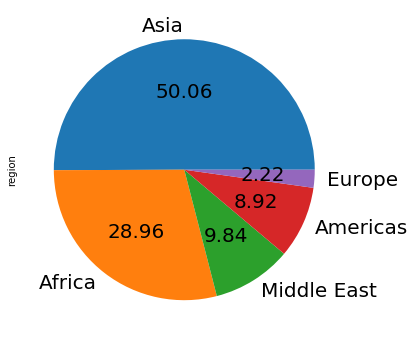

In [3]:
#We make a pie chart over the amount of conflicts in each region as a percentage of the total number of conflicts. 

Regions = cw_year['region'].value_counts().plot.pie( autopct='%.2f', fontsize=20, figsize=(6, 6))




It is clear to see that Asia had the most armed conflicts in 2018. A big reason for this is that Afghanistan is located in Asia, and we will see just below that Afghanistan had more than 3.700 armed conflicts in 2018. We also see that it is clear that Europe has the least conflicts.

In [4]:
# We group the armed conflicts by country:
grouped = cw_year.groupby('country')

cw_year_count = grouped.count()
cw_year_grouped = grouped.sum()

# We now count how may armed conflicts there have been in the year per country.
cw_year_grouped['Armed_conflicts'] = cw_year_count['Deaths']
cw_year_grouped.reset_index(inplace=True)

#As we sum the occurences for each country the values year, latitude and longitude don't make sense anymore as it will sum the value of the year for every conflict the country has had, so we drop these.

drop_these = ['year', 'longitude', 'latitude']
cw_year_grouped.drop(drop_these, axis=1, inplace=True)
cw_year_grouped.head(2)

,country,Deaths,Africa,Americas,Asia,Europe,Middle East,Armed_conflicts
0,Afghanistan,26888,0.0,0.0,3722.0,0.0,0.0,3722
1,Algeria,35,10.0,0.0,0.0,0.0,0.0,10


In [5]:

# Remove Afghanistan from the list as it will make the following graph hard to interpret
cw_year_noa = cw_year_grouped[cw_year_grouped['country'] != 'Afghanistan' ]
cw_year_noa.reset_index(inplace=True)

cw_year_noa.head(5)


,index,country,Deaths,Africa,Americas,Asia,Europe,Middle East,Armed_conflicts
0,1,Algeria,35,10.0,0.0,0.0,0.0,0.0,10
1,2,Angola,24,6.0,0.0,0.0,0.0,0.0,6
2,3,Armenia,1,0.0,0.0,0.0,1.0,0.0,1
3,4,Australia,2,0.0,0.0,2.0,0.0,0.0,2
4,5,Azerbaijan,16,0.0,0.0,0.0,17.0,0.0,17


In [6]:
cw_year_low = cw_year_noa[cw_year_noa['Armed_conflicts'] <=50]

cw_year_low.head()

cw_year_high = cw_year_noa[cw_year_noa['Armed_conflicts'] >50]

cw_year_high.head()

,index,country,Deaths,Africa,Americas,Asia,Europe,Middle East,Armed_conflicts
7,8,Brazil,440,0.0,87.0,0.0,0.0,0.0,87
10,11,Cameroon,983,233.0,0.0,0.0,0.0,0.0,233
11,12,Central African Republic,581,77.0,0.0,0.0,0.0,0.0,77
13,14,Colombia,149,0.0,57.0,0.0,0.0,0.0,57
15,16,Democratic Republic of the Congo,2903,401.0,0.0,0.0,0.0,0.0,401


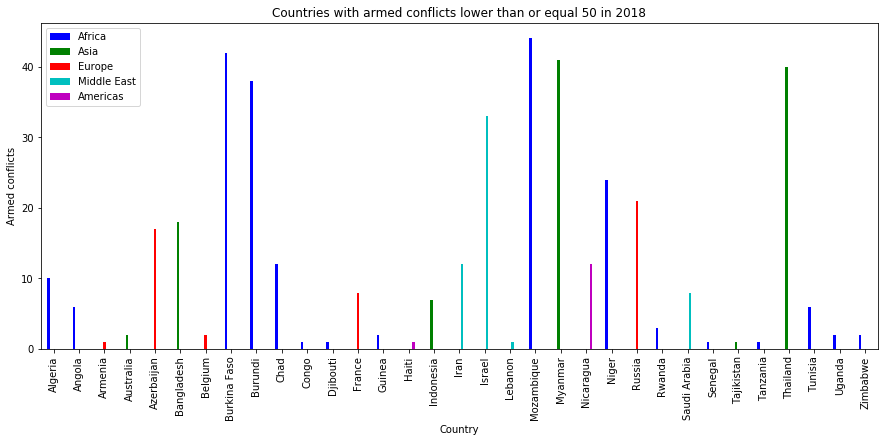

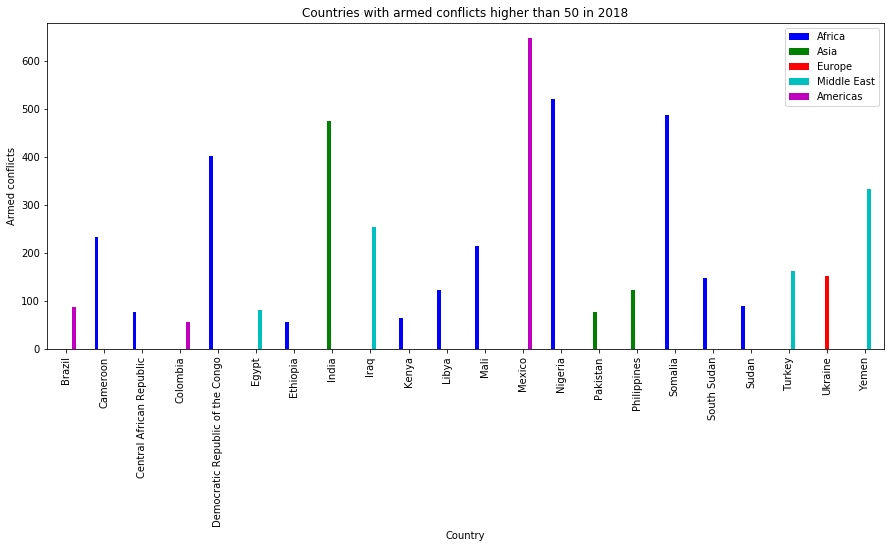

In [7]:
fig, ax = plt.subplots(figsize = (15,6))
fig = cw_year_low.plot(x="country", y=["Africa" , "Asia", "Europe", "Middle East", "Americas"], kind="bar", color=['b', 'g', 'r' , 'c', 'm'], width=0.5, ax=ax,)

x = cw_year_grouped['country']

plt.title('Countries with armed conflicts lower than or equal 50 in 2018')
plt.ylabel('Armed conflicts')
plt.xlabel('Country')

plt.show()

fig, ax = plt.subplots(figsize = (15,6))
fig = cw_year_high.plot(x="country", y=["Africa" , "Asia", "Europe", "Middle East", "Americas"], kind="bar", color=['b', 'g', 'r' , 'c', 'm'], width=0.5, ax=ax,)

x = cw_year_grouped['country']

plt.title('Countries with armed conflicts higher than 50 in 2018')
plt.ylabel('Armed conflicts')
plt.xlabel('Country')

plt.show()

The figures shows that there are more countries where the number of conflicts in 2018 are lower than 50. We also see that it is mainly countries in Africa where the number of conflicts are high. The number of conflicts in each country also ranges from below 10 to above 600, but the majority of the countries have less than 50 cnflicts a year. The regions with the lowest number of conflicts are the Americas and Europe, but we see that the country with the highest amount of conflicts besides Afghanistan is Mexico. The countries in Europe who has had conflicts are countries where there have been war (Ukraine) or terrorist attacks (France and Belgium). 

# Making the map

We now begin with making the interactive map. We first read our file containing the data that is going to make the outline/ shape of our map. We then merge the two datafiles together so we get both the number of deaths and the geometric code. 

Our map cannot open in Github, but will open in Jupyter lab or Visual Studio Code. 


In [8]:
#We now start making the map
#We read our file and we only want the two columns 'Admin' and 'geometry'
gdf = gpd.read_file("Countries/ne_110m_admin_0_countries.shp")[["ADMIN", "geometry"]]

#Rename columns.
gdf.columns = ['country', 'geometry']


# We drop Antarctica, as we won't have data for that.
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

#Read data to json.
cw_year_grouped_json = json.loads(cw_year_grouped.to_json())
#Convert to String like object.
json_data = json.dumps(cw_year_grouped_json)

country                                           geometry
159  Antarctica  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...


In [9]:
# join the geodataframe with the csv dataframe
merged = gdf.merge(cw_year_grouped, how='left', left_on="country", right_on="country")
merged = merged[['country', 'geometry', 'Deaths' ]] # The colum best decribes the best guess of deaths
merged1 = merged.merge(cw_year_grouped, how='left', left_on="country", right_on="country")

merged1.head()
merged1.info()
no_data_dict = {column : 'No data' for column in merged1.columns if column!='geometry'}
merged1.fillna(no_data_dict,inplace=True) # If there is no data for the country we want it to come up as "No data"
merged1.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 10 columns):
country            176 non-null object
geometry           176 non-null geometry
Deaths_x           54 non-null float64
Deaths_y           54 non-null float64
Africa             54 non-null float64
Americas           54 non-null float64
Asia               54 non-null float64
Europe             54 non-null float64
Middle East        54 non-null float64
Armed_conflicts    54 non-null float64
dtypes: float64(8), geometry(1), object(1)
memory usage: 15.1+ KB


,country,geometry,Deaths_x,Deaths_y,Africa,Americas,Asia,Europe,Middle East,Armed_conflicts
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",No data,No data,No data,No data,No data,No data,No data,No data
1,United Republic of Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",No data,No data,No data,No data,No data,No data,No data,No data
2,Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",No data,No data,No data,No data,No data,No data,No data,No data
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",No data,No data,No data,No data,No data,No data,No data,No data
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",No data,No data,No data,No data,No data,No data,No data,No data


In [10]:

#Read data to json
merged1_json = json.loads(merged1.to_json())
grid = json.dumps(merged1_json)


In [11]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = grid)
pointsource = ColumnDataSource(merged1)

#Create figure object.
p = figure(title = 'Armed conflicts in 2018', plot_height = 600 , plot_width = 1050)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Define a sequential multi-hue color palette.
palette = brewer['PuBu'][8]
#Reverse color order so that dark blue is highest deaths.
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 3000, nan_color = '#d9d9d9')
#Add patch renderer to figure. 
patch=p.patches('xs','ys', source = geosource,fill_color = {'field' :'Deaths_x', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.35, fill_alpha = 1, 
                hover_fill_color="#eccbf5")

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '50': '50', '100':'100', '250':'250', '500':'500', '800':'800', '1000':'1000','2000':'2000', '3000': '>3000'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

p.add_tools(HoverTool(tooltips=[('Country','@country'),('Deaths','@Deaths_x'), ('Armed conflicts', '@Armed_conflicts')], renderers=[patch]))
p.add_layout(color_bar, 'below')

#Display figure.
show(p)



From the map we see that the amount of conflicts are mainly centered around Africa, the Middle East and East Asia.